## 4.1 Exercise 1 (5 points)

Create a function called `create_point_geom()` that has two parameters (x_coord, y_coord). Function should create a shapely Point geometry object and return that. Demonstrate the usage of the function by creating 3 point geometries with the function.

In [1]:
## Function to create point from coordinates
from shapely.geometry import Point
def create_point_geom(x, y):
    """This function creates a point geometry
    input: x, y (numbers)
    """
    point_func = Point(x,y)
    return point_func

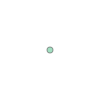

In [2]:
## Test of the function below:
point1 = create_point_geom(0.5,2.4)
point1

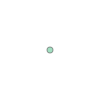

In [3]:
point2 = create_point_geom(5.8,6.7)
point2

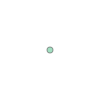

In [4]:
point3 = create_point_geom(-1.5,10.6)
point3

Create a function `get_x_coord()` that takes a shapely point object and returns the x coordinate of that point

In [5]:
def get_x_coord(geom):
    """This function returns the x coordinate of a point geometry
    input: geom (a point geometry)
    We should first check if the geometry is a point.
    """
    if geom.geom_type == 'Point':
        return (geom.x)
    else:
        return ("This is not a point!")

In [6]:
## Test of the function below:
get_x_coord (point1)

0.5

In [7]:
get_x_coord (point2)

5.8

In [8]:
get_x_coord (Point(0.4,0.5))

0.4

Create a function called `getCentroid()` that takes any kind of Shapely’s geometry as input and returns a centroid of that geometry. Demonstrate the usage of the function.

In [9]:
def getCentroid(geom):
    """This function returns the centroid coordinate of any geometry
    input: geom (any geometry)
    """
    center = geom.centroid
    return (center)

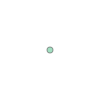

In [10]:
## Test of the function below:
from shapely.geometry import Polygon
poly1 = Polygon([(1,3), (2,6), (5,9), (7,-1)])
getCentroid (poly1)

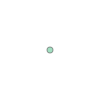

In [11]:
from shapely.geometry import LineString
line1 = LineString([(1,3), (2,6), (5,9)])
getCentroid (line1)

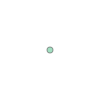

In [12]:
poly2 = Polygon([(-5,3), (2,0), (9,9)])
getCentroid (poly2)

Create a function called `getArea()` that takes a Shapely’s Polygon -object as input and returns the area of that geometry. Demonstrate the usage of the function.

In [13]:
## This function returns the area of a polygon.
## We should first check if the input is a polygon
def getArea (geom):
    if geom.geom_type == 'Polygon':
        return (geom.area)
    else:
        return ("This is not a polygon!")

In [14]:
## Test of the function below
from shapely.geometry import Polygon
getArea (Polygon([(0,0), (0,1), (1,1), (1,0)]))

1.0

In [15]:
poly1 = Polygon([(0,0), (0,6), (3,4), (3,2)])
getArea (poly1)

12.0

In [16]:
poly2 = Polygon([(-1,-1), (-4,7), (4,7), (1,7)])
getArea (poly1)

12.0

## 4.2 Exercise 2 (5 points)
1. Create two geometries—a square and a circle—in such a way that they partially overlap, so that of the circle area overlaps with the square. Hint: use the `buffer()` function applied on a point geometry to create the circle.
2. Calculate and plot the geometry representing the union of the square and the circle.
<figure class="image">
<img src="https://geobgu.xyz/py/_images/exercise_solutions_shapely_14_0.svg" alt="drawing" width="100" style="display: block; margin: 0 auto"/>
</figure>
3. Calculate and plot the geometry representing the intersection of the square and the circle (Fig. 42).
<figure class="image">
<img src="https://geobgu.xyz/py/_images/exercise_solutions_shapely_16_0.svg" alt="drawing" width="100" style="display: block; margin: 0 auto"/>
</figure>
4. Calculate the area of the intersection and of the the union geometries.


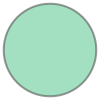

In [17]:
## 4.2.1
## Create the circle
from shapely.geometry import LinearRing
circle1 = Point (0,0).buffer (2)
circle1

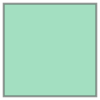

In [18]:
## 4.2.1 continues
## Create the square
from shapely.geometry import Polygon
poly1 = Polygon ([(0,0), (0,-4), (-4,-4), (-4,0)])
poly1

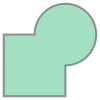

In [19]:
## 4.2.2
## Union of the square and the circle
union1 = poly1.union(circle1)
union1

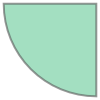

In [20]:
## 4.2.3
## Intersection of the square and the circle
intersection1 = poly1.intersection(circle1)
intersection1

In [21]:
## 4.2.4
## Area of the intersection
area_inters = intersection1.area
area_inters

3.1365484905459398

In [22]:
## 4.2.4 continues
## Area of the union
area_union = union1.area
area_union

25.409645471637823

## 4.3 Exercise 3 (5 points)
In the following exercise, we are going to use a subset of the [Bus Stop Shelters dataset from NYC OpenData](https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz) containing the locations of bus stops in Rockaway Beach.

For now, let's assume these locations make up one route.

In [23]:
import pandas as pd
bus_stops = pd.read_csv('Bus_Stop_Shelter_Rockaways.csv')
bus_stops = bus_stops.sort_values(['Longitude', 'Latitude'])

Let's look at the first 5 rows

In [24]:
# Insert your code here
bus_stops.head(5)

,Unnamed: 0,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,Shelter_ID,Corner,On_Street,Cross_Stre,Longitude,Latitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac
19,2759,POINT (-73.84784861080628 40.57611876479319),4,Queens,414,32,23,10,5,QN04567,NE,ROCKAWAY BEACH BLVD,BEACH 129 ST,-73.847850,40.576127,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
11,2418,POINT (-73.83838161278774 40.58131076382985),4,Queens,414,32,23,10,5,QN04159,SW,NEWPORT AV,BEACH 116 ST,-73.838383,40.581319,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,AE,NaN,1.0
3,2328,POINT (-73.8290056165102 40.58202976319081),4,Queens,414,32,23,10,5,QN04051,SE,ROCKAWAY BEACH BLVD,BEACH 108 ST,-73.829007,40.582038,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
4,2329,POINT (-73.8264796162047 40.58300576306968),4,Queens,414,32,23,10,5,QN04053,NW,ROCKAWAY BEACH BLVD,BEACH 105 ST,-73.826481,40.583014,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0
2,2317,POINT (-73.82564861669952 40.5830027625186),4,Queens,414,32,23,10,5,QN04034,SE,ROCKAWAY BEACH BLVD,BEACH 105 ST,-73.825650,40.583011,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,X,AREA OF MINIMAL FLOOD HAZARD,1.0


Now, let's extract the `Longitude` and `Latitude` from this Pandas dataframe into a list of tuple coordinates. 

I will provide some code on how to loop through all the rows in the dataframe. 

Remember: x = long and y = lat


In [25]:
# First we are going to create an empty list
stops_as_coords = []

# Then, we are going to loop through the rows of the dataframe and extract the Long and Lat values as a tuple: 
for index, row in bus_stops.iterrows():
    # We are going to append the tuple to the list
    stops_as_coords.append((row['Longitude'], row['Latitude']))

In [26]:
# Voila
stops_as_coords

[(-73.84785, 40.576127),
 (-73.838383, 40.581319),
 (-73.829007, 40.582038),
 (-73.826481, 40.583014),
 (-73.82565, 40.583011),
 (-73.823539, 40.583859),
 (-73.823243, 40.583713),
 (-73.813181, 40.587175),
 (-73.809456, 40.587669),
 (-73.807734, 40.588109),
 (-73.806896, 40.587898),
 (-73.80534, 40.5881),
 (-73.802861, 40.588536),
 (-73.80004, 40.591838),
 (-73.796488, 40.592911),
 (-73.795784, 40.592783),
 (-73.785905, 40.594866),
 (-73.784939, 40.595143),
 (-73.784717, 40.594949),
 (-73.781451, 40.595374),
 (-73.781424, 40.595184),
 (-73.775375, 40.595618),
 (-73.772797, 40.595896),
 (-73.770176, 40.595974),
 (-73.756467, 40.595427),
 (-73.755541, 40.594991),
 (-73.753559, 40.609694),
 (-73.75352, 40.594941),
 (-73.75144, 40.59495),
 (-73.74961, 40.60267),
 (-73.744599, 40.596174),
 (-73.744211, 40.595975)]

Calculate and plot a `MultiPoint` geometry with all stop locations.

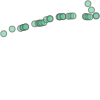

In [27]:
## Show all stop locations using MultiPoint
from shapely.geometry import MultiPoint
stops_point = MultiPoint(stops_as_coords)
stops_point


Calculate and plot a `LineString` geometry of the bus route


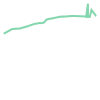

In [28]:
## LineString of but route
from shapely.geometry import LineString
bus_route = LineString(stops_as_coords)
bus_route

Calculate and plot a `LineString` geometry with the straight line between the first and last bus stops

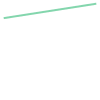

In [29]:
## Retrieve the first stop
first_stop = stops_as_coords[1]
## Retrieve the last stop
last_stop = stops_as_coords[-1]
## LineString between the first and last stop
line_between = LineString([first_stop, last_stop])
line_between

Calculate and plot the convex hull polygon of the bus stops

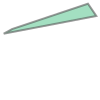

In [30]:
# Calculate the convex hull
convex_poly_stops = stops_point.convex_hull
convex_poly_stops